# Pitch Classifier

## Load the Data

In [7]:
import pandas as pd

In [8]:
pitches = pd.read_csv('data/2019-06-17_547888_Tanaka.csv')

In [9]:
pitches.head()

,start_speed,pfx_x,pfx_z,mlbam_pitch_name
0,91.87,-4.517746,9.332202,FF
1,83.05,1.624604,1.942790,SL
2,91.21,-7.260078,7.255023,FF
3,81.80,4.409871,0.787128,SL
4,80.63,5.149924,2.596144,SL


In [10]:
pitches.columns

Index(['start_speed', 'pfx_x', 'pfx_z', 'mlbam_pitch_name'], dtype='object')

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
pitches['mlbam_pitch_name'].unique()

array(['FF', 'SL', 'FS', 'CH', 'CU', 'SI', 'FT'], dtype=object)

In [19]:
COLORS = {
    'FF': 'red',
    'SL': 'green',
    'FS': 'blue',
    'CH': 'orange',
    'SI': 'purple',
    'FT': 'brown',
}

In [ ]:
colors = [ COLORS.get(pitch_type, 'black') for pitch in pitches['m']]

ValueError: Invalid RGBA argument: 'FF'

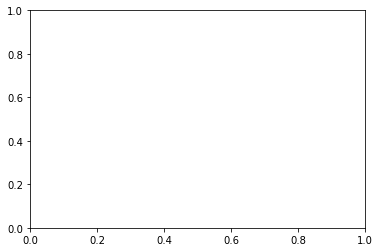

In [15]:
plt.scatter(pitches['pfx_x'], pitches['start_speed'], c=pitches['mlbam_pitch_name'])

## Normalize the Data

In [6]:
cols_to_norm = ['start_speed', 'pfx_x', 'pfx_z']

In [8]:
pitches[cols_to_norm] = pitches[cols_to_norm].apply(lambda x: (x-x.min()) / (x.max() - x.min()))

In [9]:
pitches.head()

,start_speed,pfx_x,pfx_z,mlbam_pitch_name
0,0.926975,0.339739,0.970198,FF
1,0.488823,0.660851,0.508245,SL
2,0.894188,0.196375,0.840342,FF
3,0.426726,0.806460,0.435998,SL
4,0.368604,0.845149,0.549089,SL


In [1]:
import tensorflow as tf

In [4]:
start_speed = tf.feature_column.numeric_column('start_speed')
pfx_x = tf.feature_column.numeric_column('pfx_x')
pfx_z = tf.feature_column.numeric_column('pfx_z')